In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
df['BMI'].unique().sum()

np.float64(8359.0)

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


(array([86., 75., 53., 26., 15.,  9.,  0.,  1.,  1.,  2.]),
 array([0.088 , 0.3212, 0.5544, 0.7876, 1.0208, 1.254 , 1.4872, 1.7204,
        1.9536, 2.1868, 2.42  ]),
 <BarContainer object of 10 artists>)

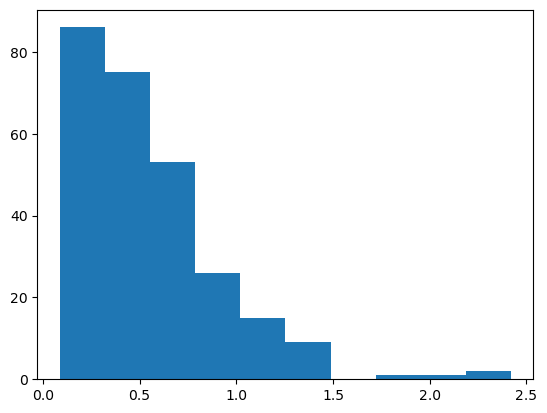

In [10]:
plt.hist(df[df['Outcome']==1]['DiabetesPedigreeFunction'])


(array([224., 138.,  82.,  33.,  11.,   3.,   4.,   4.,   0.,   1.]),
 array([0.078 , 0.3031, 0.5282, 0.7533, 0.9784, 1.2035, 1.4286, 1.6537,
        1.8788, 2.1039, 2.329 ]),
 <BarContainer object of 10 artists>)

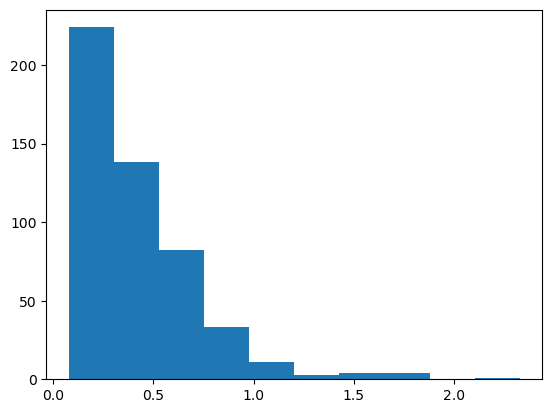

In [11]:
plt.hist(df[df['Outcome']==0]['DiabetesPedigreeFunction'])

In [12]:
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = df['Outcome']

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state =42,test_size = 0.2)

In [14]:
model1 = LogisticRegression()
model1.fit(X_train,y_train)
y_pred = model1.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154

[[78 21]
 [18 37]]


In [15]:
linear =  LinearRegression()
linear.fit(X_train,y_train)


LinearRegression()

In [16]:
reg_pred = linear.predict(X_test)
reg_pred

array([ 0.33550028,  0.23809869,  0.1510522 ,  0.2401365 ,  0.48142376,
        0.45257375, -0.17450469,  0.60662287,  0.52417796,  0.70476953,
        0.32360466,  0.85290601,  0.38466612,  0.36056948,  0.09946712,
        0.41539557,  0.17869123,  0.07782301,  0.80730861,  0.51299477,
        0.28090594,  0.08303057,  0.5099157 ,  0.11381771,  0.51325022,
        0.82528549,  0.17892718, -0.0594202 ,  0.28338572,  0.16407949,
        0.83851225,  0.80737515,  0.68154389,  0.7649502 ,  0.56140297,
        0.62123131,  1.06134554,  0.30990775,  0.51752336,  0.63691482,
        0.07075333,  0.57757007,  0.55015462,  0.37541745, -0.07644182,
        0.50119208,  0.59600162,  0.27464761,  0.42477995,  0.9941898 ,
        0.00969584,  0.61763578,  0.73395288,  0.31090975,  0.13456812,
       -0.02536316,  0.71219147, -0.30518218,  0.41994556,  0.67869594,
        0.66891428,  0.3798452 ,  0.2956646 ,  0.288035  ,  0.06813053,
        0.55464338,  0.01368504,  0.6272007 , -0.02033281,  0.63

#### Assumptions


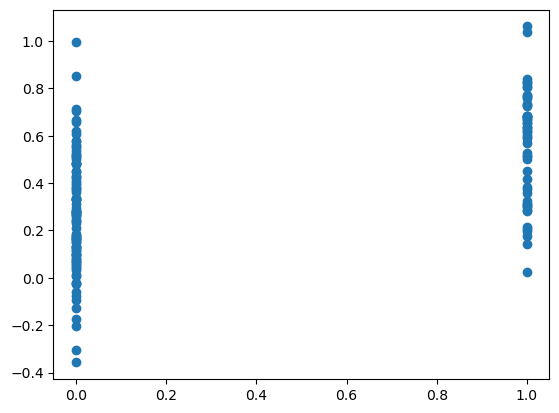

In [17]:
## plot scatter 
plt.scatter(y_test,reg_pred)

In [18]:
## Residuals 
residuals = y_test-reg_pred
residuals

668   -0.335500
324   -0.238099
624   -0.151052
690   -0.240136
473   -0.481424
         ...   
355    0.318410
534   -0.163167
344   -0.481562
296    0.698983
462   -0.261109
Name: Outcome, Length: 154, dtype: float64

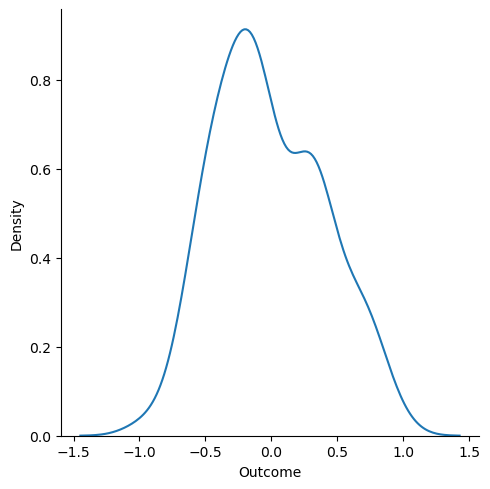

In [19]:
# plot this residuals
sns.displot(residuals,kind='kde')

In [20]:
scaler =  StandardScaler()
X_train=scaler.fit_transform(X_train)

X_test =scaler.fit_transform(X_test)

In [21]:
X_train,y_train


(array([[-0.52639686, -1.15139792, -3.75268255, ..., -4.13525578,
         -0.49073479, -1.03594038],
        [ 1.58804586, -0.27664283,  0.68034485, ..., -0.48916881,
          2.41502991,  1.48710085],
        [-0.82846011,  0.56687102, -1.2658623 , ..., -0.42452187,
          0.54916055, -0.94893896],
        ...,
        [ 1.8901091 , -0.62029661,  0.89659009, ...,  1.76054443,
          1.981245  ,  0.44308379],
        [-1.13052335,  0.62935353, -3.75268255, ...,  1.34680407,
         -0.78487662, -0.33992901],
        [-1.13052335,  0.12949347,  1.43720319, ..., -1.22614383,
         -0.61552223, -1.03594038]]),
 60     0
 618    1
 346    0
 294    0
 231    1
       ..
 71     0
 106    0
 270    1
 435    1
 102    0
 Name: Outcome, Length: 614, dtype: int64)

In [22]:
X_test

array([[ 0.49124165, -0.72667791, -0.44147615, ...,  0.23374785,
        -0.17094071,  0.66661154],
       [-0.63368347, -0.28534901,  0.31890843, ...,  0.43537945,
        -1.08608042, -1.07335756],
       [-0.63368347, -0.41144298, -0.17310512, ..., -0.14579397,
        -1.05362866, -1.07335756],
       ...,
       [ 1.05370422, -0.82124838,  0.18472291, ...,  0.56584695,
         0.00754398,  1.77386461],
       [-0.63368347,  0.78644972,  0.09526591, ..., -0.47789306,
        -0.47274211, -0.44064153],
       [ 1.05370422, -1.48324172,  0.09526591, ...,  0.38793672,
         0.72148276,  0.35025352]])

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [24]:
scaled_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1.0
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0.0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1.0
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0.0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1.0
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000,0.0
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000,0.0
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000,0.0
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333,1.0


In [25]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test,reg_pred))
print(mean_squared_error(y_test,reg_pred))
print(np.sqrt,(mean_squared_error(y_test,reg_pred)))

0.3481282599992823
0.17104527280850096
<ufunc 'sqrt'> 0.17104527280850096


In [26]:
model2 =  RandomForestClassifier()
model2.fit(X_train,y_train)
y_pred = model2.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83        99
           1       0.71      0.65      0.68        55

    accuracy                           0.78       154
   macro avg       0.76      0.75      0.76       154
weighted avg       0.78      0.78      0.78       154



In [27]:
tuning =  RandomForestClassifier(n_estimators=100,max_depth = 5)

tuning.fit(X_train,y_train)

y_pred = tuning.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82        99
           1       0.69      0.60      0.64        55

    accuracy                           0.76       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.75      0.76      0.76       154

[[84 15]
 [22 33]]


In [28]:
import joblib
joblib.dump(linear, "Diabetes_prediction.joblib")
print("Model saved successfully!")

Model saved successfully!
